In [23]:
from math import sqrt, pi, e
import json
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pandas as pd
from random import randint

In [24]:
def print_json(dictionary):
    print(json.dumps(dictionary, sort_keys=True, indent=4))

In [55]:
# f = open('slippages.json', 'r')
# f = open('slippages_5m.json', 'r')
# f = open('slippages_10m.json', 'r')
# f = open('slippages_20m.json', 'r')
# f = open('slippages_20m_2.json', 'r')
# f = open('slippages_8h.json', 'r')
f = open('slippages_4h.json', 'r')
# f = open('slippages_2h.json', 'r')

slippages_data = json.loads(f.read())
sample_size = slippages_data['sample_size']

bids_slippages = slippages_data['bids']
asks_slippages =  slippages_data['asks']
# bids_slippages_percentages = slippages_data['bids_percentage']
# asks_slippages_percentages =  slippages_data['asks_percentage']

f.close()

def calculate_mean(l):
  return sum(l)/len(l)

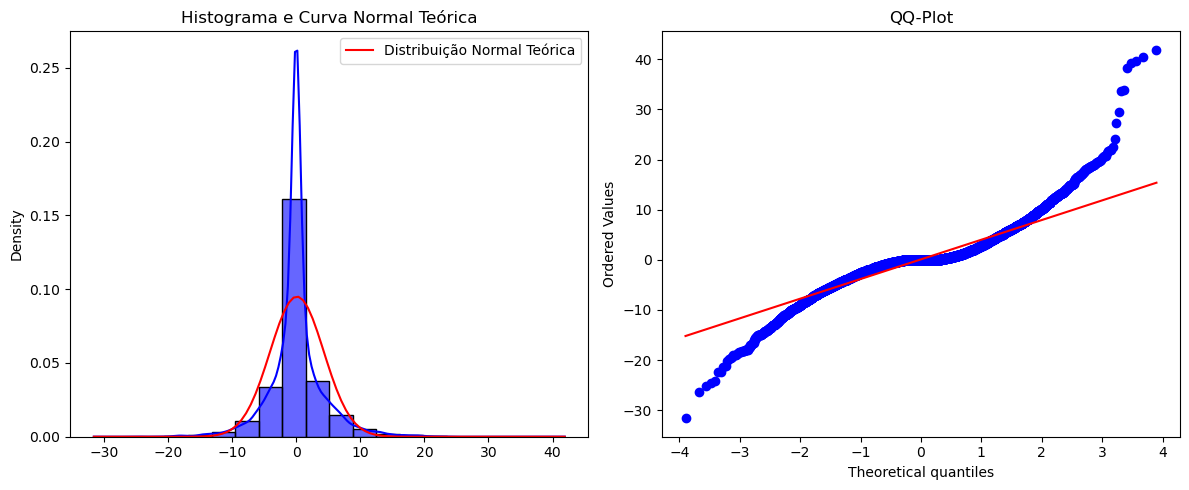

KS-Test: Estatística=0.1573, p-valor=0.0000
Rejeitamos H0: os dados NÃO seguem uma distribuição normal (KS-Test)
Teste de Anderson-Darling: Estatística=642.0265
Rejeitamos H0: os dados NÃO seguem uma distribuição normal (Anderson-Darling)
Teste de D'Agostino-Pearson: Estatística=2902.9411, p-valor=0.0000
Rejeitamos H0: os dados NÃO seguem uma distribuição normal (D'Agostino-Pearson)


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

dados = bids_slippages

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.histplot(dados, bins=20, kde=True, stat="density", ax=axes[0], color="blue", alpha=0.6)
x = np.linspace(min(dados), max(dados), 100)
pdf = stats.norm.pdf(x, np.mean(dados), np.std(dados, ddof=1))
axes[0].plot(x, pdf, 'r', label="Distribuição Normal Teórica")
axes[0].set_title("Histograma e Curva Normal Teórica")
axes[0].legend()

stats.probplot(dados, dist="norm", plot=axes[1])
axes[1].set_title("QQ-Plot")

plt.tight_layout()
plt.show()

ks_stat, ks_p = stats.kstest(dados, 'norm', args=(np.mean(dados), np.std(dados, ddof=1)))
print(f"KS-Test: Estatística={ks_stat:.4f}, p-valor={ks_p:.4f}")


alpha = 0.05

if ks_p < alpha:
    print("Rejeitamos H0: os dados NÃO seguem uma distribuição normal (KS-Test)")
else:
    print("Não rejeitamos H0: os dados podem seguir uma distribuição normal (KS-Test)")

ad_stat, ad_crit, _ = stats.anderson(dados, dist='norm')
print(f"Teste de Anderson-Darling: Estatística={ad_stat:.4f}")
if ad_stat > ad_crit[2]:  # Nível de significância de 5%
    print("Rejeitamos H0: os dados NÃO seguem uma distribuição normal (Anderson-Darling)")
else:
    print("Não rejeitamos H0: os dados podem seguir uma distribuição normal (Anderson-Darling)")


dag_stat, dag_p = stats.normaltest(dados)
print(f"Teste de D'Agostino-Pearson: Estatística={dag_stat:.4f}, p-valor={dag_p:.4f}")
if dag_p < 0.05:
    print("Rejeitamos H0: os dados NÃO seguem uma distribuição normal (D'Agostino-Pearson)")
else:
    print("Não rejeitamos H0: os dados podem seguir uma distribuição normal (D'Agostino-Pearson)")

Normal: KS-Test Estatística=0.1573, p-valor=0.0000


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:6111: RuntimeWarning:

invalid value encountered in log



Log-Normal: KS-Test Estatística=0.1500, p-valor=0.0000
Cauchy: KS-Test Estatística=0.0988, p-valor=0.0000
T-Student: KS-Test Estatística=0.0987, p-valor=0.0000
Laplace: KS-Test Estatística=0.1133, p-valor=0.0000


/usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning:

invalid value encountered in sqrt

/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning:

The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.



Beta: KS-Test Estatística=0.1504, p-valor=0.0000
Gumbel: KS-Test Estatística=0.1836, p-valor=0.0000
Pareto: KS-Test Estatística=0.5003, p-valor=0.0000
Exponencial Generalizada: KS-Test Estatística=0.1668, p-valor=0.0000


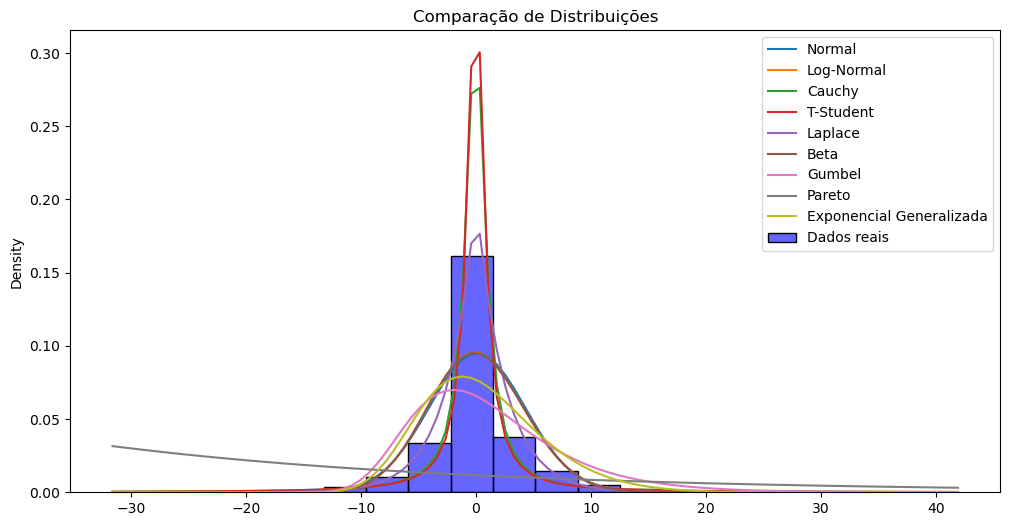

A melhor distribuição pelo KS-Test foi: T-Student


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

dados = bids_slippages

distribuicoes = {
    "Normal": stats.norm,
    # "Gama": stats.gamma,
    "Log-Normal": stats.lognorm,
    # "Weibull": stats.weibull_min,
    "Cauchy": stats.cauchy,
    "T-Student": stats.t,
    "Laplace": stats.laplace,
    "Beta": stats.beta,
    "Gumbel": stats.gumbel_r,
    "Pareto": stats.pareto,
    "Exponencial Generalizada": stats.genextreme
}

plt.figure(figsize=(12, 6))
sns.histplot(dados, bins=20, kde=False, stat="density", color="blue", alpha=0.6, label="Dados reais")

melhor_ks = float('inf')
melhor_dist = None

x = np.linspace(min(dados), max(dados), 100)

for nome, dist in distribuicoes.items():
    try:
        parametros = dist.fit(dados)
        pdf = dist.pdf(x, *parametros)
        
        plt.plot(x, pdf, label=nome)

        ks_stat, ks_p = stats.kstest(dados, dist.cdf, args=parametros)
        print(f"{nome}: KS-Test Estatística={ks_stat:.4f}, p-valor={ks_p:.4f}")
        
        if ks_stat < melhor_ks:
            melhor_ks = ks_stat
            melhor_dist = nome
    except Exception as e:
        print(f"Erro ao testar {nome}: {e}")

plt.title("Comparação de Distribuições")
plt.legend()
plt.show()

print(f"A melhor distribuição pelo KS-Test foi: {melhor_dist}")


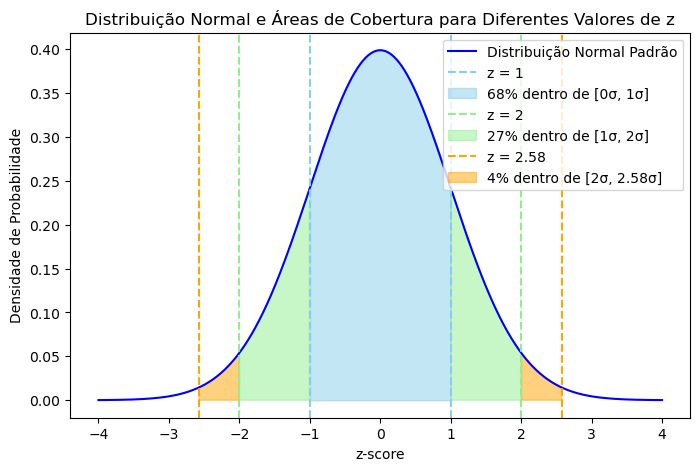

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, 0, 1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Distribuição Normal Padrão", color='blue')

z_values = [0, 1, 2, 2.58]
colors = ['', 'skyblue', 'lightgreen', 'orange']
labels = [0, 68, 95, 99]

for i in range(len(z_values)):
  if i == 0: continue

  plt.axvline(z_values[i], color=colors[i], linestyle='dashed', label='z = ' + str(z_values[i]))
  plt.axvline(-z_values[i], color=colors[i], linestyle='dashed')
  plt.fill_between(x, y, where=(np.logical_and(z_values[i-1] <= np.abs(x), np.abs(x) <= z_values[i])), color=colors[i], alpha=0.5, label=f'{labels[i] - labels[i-1]}% dentro de [{z_values[i-1]}σ, {z_values[i]}σ]')

plt.xlabel('z-score')
plt.ylabel('Densidade de Probabilidade')
plt.title('Distribuição Normal e Áreas de Cobertura para Diferentes Valores de z')
plt.legend()

plt.show()


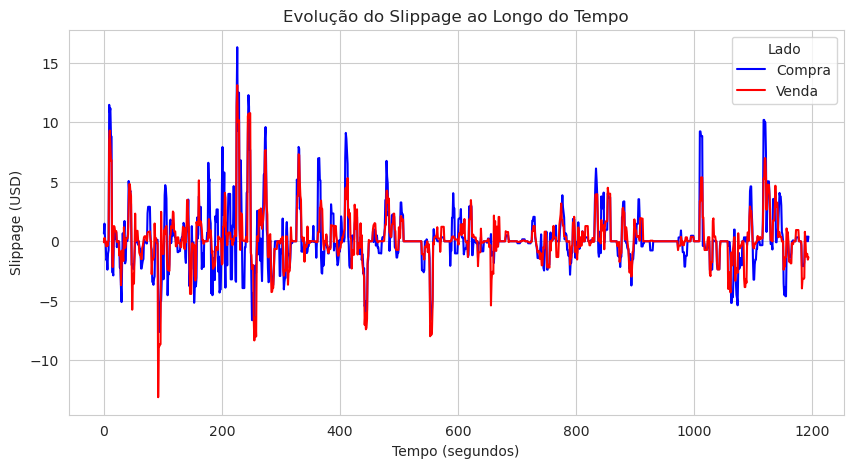

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_slippages_over_time_matplotlib(time_start, time_sample):
    time_end = time_start + time_sample

    time = list(range(time_start, time_end)) + list(range(time_start, time_end))
    slippages = bids_slippages[time_start:time_end] + asks_slippages[time_start:time_end]
    sides = (['Compra'] * len(bids_slippages[time_start:time_end])) + (['Venda'] * len(asks_slippages[time_start:time_end]))

    # Configuração do estilo
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 5))

    # Plota as linhas
    sns.lineplot(x=time, y=slippages, hue=sides, palette={"Compra": "blue", "Venda": "red"})

    # Labels
    plt.xlabel("Tempo (segundos)")
    plt.ylabel("Slippage (USD)")
    plt.title("Evolução do Slippage ao Longo do Tempo")

    plt.legend(title="Lado", loc="upper right")
    plt.show()

plot_slippages_over_time_matplotlib(0, sample_size)


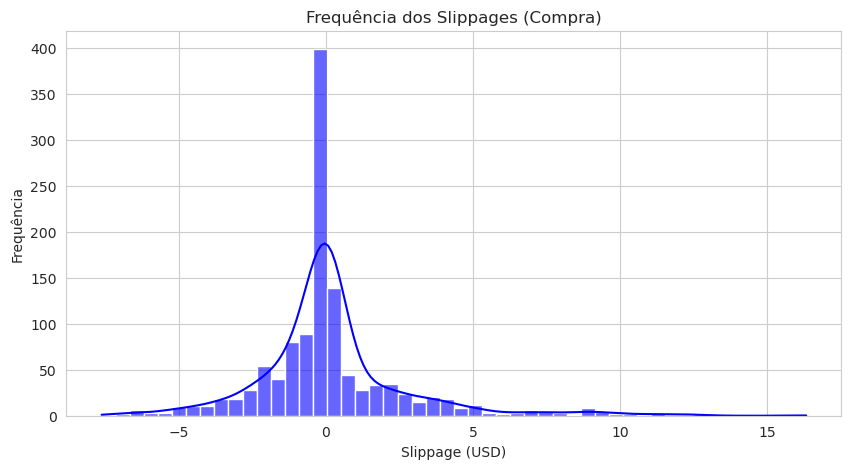

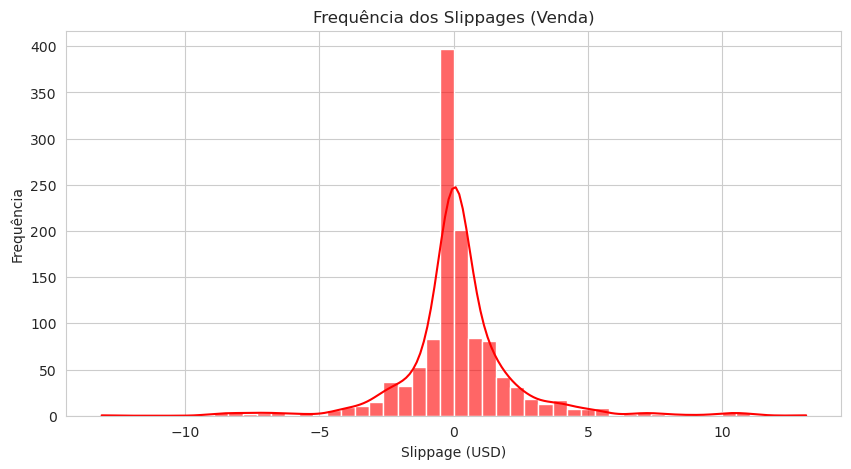

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_slippages_frequency_matplotlib(slippages, time_start, time_sample, side):
    time_end = time_start + time_sample
    selected_slippages = slippages[time_start:time_end]

    # Configuração do estilo
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 5))

    # Criando o histograma
    sns.histplot(selected_slippages, bins=50, kde=True, color="blue" if side == "Compra" else "red", alpha=0.6)

    # Labels e título
    plt.xlabel("Slippage (USD)")
    plt.ylabel("Frequência")
    plt.title(f"Frequência dos Slippages ({side})")

    plt.show()

plot_slippages_frequency_matplotlib(bids_slippages, 0, sample_size, 'Compra')
plot_slippages_frequency_matplotlib(asks_slippages, 0, sample_size, 'Venda')


In [42]:
def calculate_statistics(slippages):
  # z necessary for 99% confidence
  z = 2.58

  # z necessary for 99.99% confidence
  # z = 3.89


  mean = 0
  variance = 0
  standard_deviation = 0

  mean = sum(slippages)/len(slippages)

  for slippage in slippages:
    variance += (slippage - mean)**2

  variance /= len(slippages)

  standard_deviation = sqrt(variance)

  sample_size = len(slippages)

  confidence_interval_without_sample_size = [mean - z*(standard_deviation), mean + z*(standard_deviation)]
  confidence_interval = [mean - z*(standard_deviation)/sqrt(sample_size), mean + z*(standard_deviation)/sqrt(sample_size)]

  data = {
    'mean': mean,
    'variance': variance,
    'standard_deviation': standard_deviation,
    'sample_size': sample_size,
    'confidence_interval': confidence_interval,
    'confidence_interval_without_sample_size': confidence_interval_without_sample_size
  }

  return data

bids_statistics = calculate_statistics(bids_slippages)
asks_statistics = calculate_statistics(asks_slippages)

print_json(bids_statistics)
print()
print_json(asks_statistics)

{
    "confidence_interval": [
        -0.01002517599212338,
        0.37206509773269997
    ],
    "confidence_interval_without_sample_size": [
        -6.423175823700248,
        6.785215745440825
    ],
    "mean": 0.1810199608702883,
    "sample_size": 1195,
    "standard_deviation": 2.559765807973076,
    "variance": 6.552400991668054
}

{
    "confidence_interval": [
        0.015551265340694037,
        0.340157947680238
    ],
    "confidence_interval_without_sample_size": [
        -5.432772594887905,
        5.788481807908837
    ],
    "mean": 0.177854606510466,
    "sample_size": 1195,
    "standard_deviation": 2.1746617059683606,
    "variance": 4.729153535405221
}


In [57]:
bids_percentages_statistics = calculate_statistics(bids_slippages_percentages)
asks_percentages_statistics = calculate_statistics(asks_slippages_percentages)

print_json(bids_percentages_statistics)
print()
print_json(asks_percentages_statistics)

NameError: name 'bids_slippages_percentages' is not defined

In [56]:
def standardize_slippages(slippages, statistics):
    mean = statistics['mean']
    standard_deviation = statistics['standard_deviation']
    standardized_slippages = [(x - mean)/standard_deviation for x in slippages]

    return standardized_slippages

standardized_bids_slippages = standardize_slippages(bids_slippages, bids_statistics)
standardized_asks_slippages = standardize_slippages(asks_slippages, asks_statistics)

print_json(calculate_statistics(standardized_bids_slippages))

standardized_bids_slippages_percentages = standardize_slippages(bids_slippages_percentages, bids_percentages_statistics)
standardized_asks_slippages_percentages = standardize_slippages(asks_slippages_percentages, asks_percentages_statistics)

print_json(calculate_statistics(standardized_bids_slippages_percentages))
print_json(calculate_statistics(standardized_asks_slippages_percentages))

{
    "confidence_interval": [
        -0.06852462372495635,
        0.0020260439271754666
    ],
    "confidence_interval_without_sample_size": [
        -4.265554382434034,
        4.199055802636253
    ],
    "mean": -0.03324928989889044,
    "sample_size": 14395,
    "standard_deviation": 1.640428330439978,
    "variance": 2.691005107310094
}


NameError: name 'bids_slippages_percentages' is not defined

In [ ]:
print(len([x for x in standardized_bids_slippages if x < -2.58])/sample_size)
print(len([x for x in standardized_asks_slippages if x <= 2.58])/sample_size)

0.013476901701979854
0.9861062869051754


In [58]:
def simulate_RFQ(slippages, time_interval, side, z):
    rejected_slippages = 0
    total_slippages = len(slippages)-time_interval

    for current_time in range(0, len(slippages)-time_interval):
        slippages_used = slippages[current_time:current_time+time_interval]
        statistics = calculate_statistics(slippages_used)

        mean = statistics['mean']
        sd = statistics['standard_deviation']
        
        if sd != 0: standardized_next_slippage = (slippages[current_time+time_interval] - mean)/sd
        else: standardized_next_slippage = 0

        if side == 'Compra':
            if standardized_next_slippage < z:
                rejected_slippages += 1
        if side == 'Venda':
            if standardized_next_slippage > z:
                rejected_slippages += 1

    return rejected_slippages/total_slippages

In [ ]:
# confidence_99_minutes = []

# for time_interval in range(60, 7201, 60):
#   confidence_99_minutes.append(simulate_RFQ(bids_slippages, time_interval, 'Compra', -2.58))

# x = [i/60 for i in range(60,7201,60)]

# d = { 'time': x, 'rejection': confidence_99_minutes }

# df = pd.DataFrame(data=d)

# fig = px.line(df, x='time', y='rejection', title='', labels = 
#   {
#     'time':'Tempo (minutos)', 'rejection':'Taxa de rejeição'
#   })

# fig.show()

In [ ]:
# confidence_99_minutes = []

# for time_interval in range(7200, 10801, 60):
#   confidence_99_minutes.append(simulate_RFQ(bids_slippages, time_interval, 'Compra', -2.58))

# x = [i/60 for i in range(7200, 10801, 60)]

# d = { 'time': x, 'rejection': confidence_99_minutes }

# df = pd.DataFrame(data=d)

# fig = px.line(df, x='time', y='rejection', title='', labels = 
#   {
#     'time':'Tempo (minutos)', 'rejection':'Taxa de rejeição'
#   })

# fig.show()

In [ ]:
# confidence_99_minutes = []

# for time_interval in range(60, 7201, 60):
#   confidence_99_minutes.append(simulate_RFQ(bids_slippages, time_interval, 'Compra', -3.9))

# x = [i/60 for i in range(60,7201,60)]

# d = { 'time': x, 'rejection': confidence_99_minutes }

# df = pd.DataFrame(data=d)

# fig = px.line(df, x='time', y='rejection', title='', labels = 
#   {
#     'time':'Tempo (minutos)', 'rejection':'Taxa de rejeição'
#   })

# fig.show()

In [ ]:
# confidence_99_minutes = []

# for time_interval in range(60, 7201, 60):
#   confidence_99_minutes.append(simulate_RFQ(asks_slippages, time_interval, 'Venda', 2.58))

# x = [i/60 for i in range(60, 7201, 60)]

# d = { 'time': x, 'rejection': confidence_99_minutes }

# df = pd.DataFrame(data=d)

# fig = px.line(df, x='time', y='rejection', title='', labels = 
#   {
#     'time':'Tempo (minutos)', 'rejection':'Taxa de rejeição'
#   })

# fig.show()

In [ ]:
# confidence_99_minutes = []

# for time_interval in range(7200, 10801, 60):
#   confidence_99_minutes.append(simulate_RFQ(asks_slippages, time_interval, 'Venda', 2.58))

# x = [i/60 for i in range(7200, 10801, 60)]

# d = { 'time': x, 'rejection': confidence_99_minutes }

# df = pd.DataFrame(data=d)

# fig = px.line(df, x='time', y='rejection', title='', labels = 
#   {
#     'time':'Tempo (minutos)', 'rejection':'Taxa de rejeição'
#   })

# fig.show()

In [ ]:
# confidence_99_minutes = []

# for time_interval in range(60, 7201, 60):
#   confidence_99_minutes.append(simulate_RFQ(asks_slippages, time_interval, 'Venda', 3.9))

# x = [i/60 for i in range(60,7201,60)]

# d = { 'time': x, 'rejection': confidence_99_minutes }

# df = pd.DataFrame(data=d)

# fig = px.line(df, x='time', y='rejection', title='', labels = 
#   {
#     'time':'Tempo (minutos)', 'rejection':'Taxa de rejeição'
#   })

# fig.show()

In [ ]:
def simulate_RFQ_2(slippages, time_interval, side):
  z = 2.58
  limits = []
  rejects = []

  for current_time in range(0, len(slippages)-time_interval):
    slippages_used = slippages[current_time:current_time+time_interval]
    statistics = calculate_statistics(slippages_used)
    rejected = False

    mean = statistics['mean']
    sd = statistics['standard_deviation']
    
    if sd != 0: standardized_next_slippage = (slippages[current_time+time_interval] - mean)/sd
    else: standardized_next_slippage = 0

    if side == 'Compra':
      if standardized_next_slippage < -z:
        rejected = True
    if side == 'Venda':
      if standardized_next_slippage > z:
        rejected = True

    limit_slippage = z * sd + mean
    
    if rejected:
      rejects.append('Cancelada')
    else:
      rejects.append('Aceita')
    
    limits.append(limit_slippage)

  return [limits, rejects]

0.007505211952744961
70538.9706862469
9.784075795884823


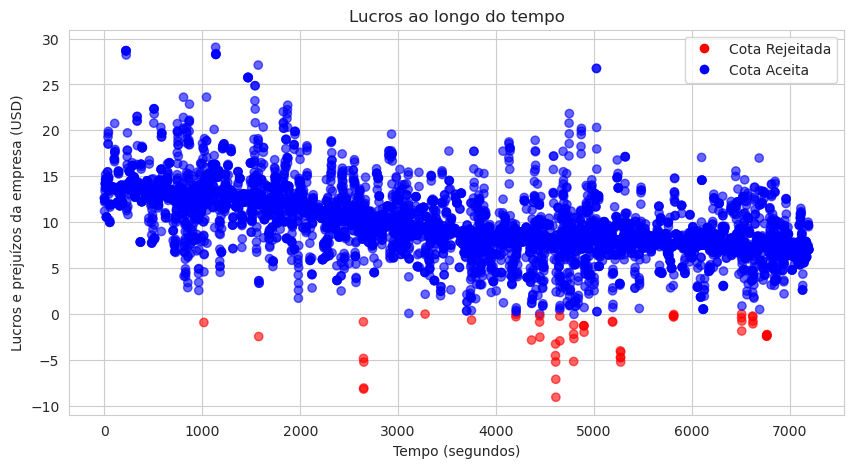

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_RFQ_3(slippages, time_interval):
    z = 2.58
    profits = []
    rejects = []
    spreads = []

    for current_time in range(0, len(slippages) - time_interval):
        slippages_used = slippages[current_time:current_time + time_interval]
        statistics = calculate_statistics(slippages_used)

        mean = statistics['mean']
        sd = statistics['standard_deviation']

        reject = (slippages[current_time + time_interval] - mean) / sd < -z
        rejects.append(reject)
        profits.append(slippages[current_time + time_interval] + mean + z * sd)
        spreads.append(mean + z * sd)

    return [profits, rejects, spreads]

[profits, rejects, spreads] = simulate_RFQ_3(bids_slippages, 7200)

percentage_rejected = len([x for x in rejects if x]) / len(rejects)
print(percentage_rejected)
print(sum([profits[i] for i in range(len(profits)) if not rejects[i]]))
print(sum(spreads) / len(spreads))

x = np.arange(len(profits))
colors = ['red' if reject else 'blue' for reject in rejects]

# Configuração do estilo
plt.figure(figsize=(10, 5))
plt.scatter(x, profits, c=colors, alpha=0.6, label="Lucros")

# Labels e título
plt.xlabel("Tempo (segundos)")
plt.ylabel("Lucros e prejuízos da empresa (USD)")
plt.title("Lucros ao longo do tempo")

# Criando legenda personalizada
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Cota Rejeitada', markerfacecolor='red', markersize=8),
    Line2D([0], [0], marker='o', color='w', label='Cota Aceita', markerfacecolor='blue', markersize=8)
]
plt.legend(handles=legend_elements, loc="upper right")

plt.show()


In [ ]:
y = simulate_RFQ_2(bids_slippages_percentages, 3600, 'Compra')
x = [i for i in range(len(y[0]))]

d = { 'time': x, 'slippage_percentage_limit': [100*k for k in y[0]], 'rejection': y[1] }

df = pd.DataFrame(data=d)

fig = px.line(df, x='time', y='slippage_percentage_limit', title='', labels = 
  {
    'time':'Tempo (segundos)', 'slippage_percentage_limit':'Limite de Aceitação (porcentagem)', 'rejection': 'Cota'
  })

fig.show()

In [ ]:
y = simulate_RFQ_2(bids_slippages, 3600, 'Compra')
x = [i for i in range(len(y[0]))]

d = { 'time': x, 'slippage_percentage_limit': y[0] }

df = pd.DataFrame(data=d)

fig = px.line(df, x='time', y='slippage_percentage_limit', title='', labels = 
  {
    'time':'Tempo (segundos)', 'slippage_percentage_limit':'Limite de Aceitação (USD)'
  })

fig.show()

In [ ]:
y = simulate_RFQ_2(asks_slippages_percentages, 3600, 'Venda')
x = [i for i in range(len(y[0]))]

d = { 'time': x, 'slippage_percentage_limit': [100*k for k in y[0]], 'rejection': y[1] }

df = pd.DataFrame(data=d)

fig = px.line(df, x='time', y='slippage_percentage_limit', title='', labels = 
  {
    'time':'Tempo (segundos)', 'slippage_percentage_limit':'Limite de Aceitação (porcentagem)', 'rejection': 'Cota'
  })

fig.show()

In [ ]:
y = simulate_RFQ_2(asks_slippages, 3600, 'Venda')
x = [i for i in range(len(y[0]))]

d = { 'time': x, 'slippage_percentage_limit': y[0] }

df = pd.DataFrame(data=d)

fig = px.line(df, x='time', y='slippage_percentage_limit', title='', labels = 
  {
    'time':'Tempo (segundos)', 'slippage_percentage_limit':'Limite de Aceitação (USD)'
  })

fig.show()

## z = -2.58

1.9758545658735174%
1.6421933744768389%
1.688535168853517%
1.750380517503805%
1.7146625632007035%
1.6929688078832335%